# Coral Bleaching
## Data Wrangling

The raw data is obtained [here](https://www.bco-dmo.org/dataset/773466), and saved in the raw_data folder in the current directory. Additional information about the data, including definition of variables that will be refereneced later, is located [here](https://www.nature.com/articles/s41597-022-01121-y).

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### 1. Load the raw data

In [2]:
# load data 
raw_data = pd.read_csv('../data/raw/global_bleaching_environmental.csv', low_memory=False)
raw_data.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,Havana,Puntilla,8519.23,Exposed,0.0287,49.90,15,9,2005,10,nd,nd,nd,50.2,301.61,302.05,300.67,296.72,304.69,1.6,8,-0.46,1,0,-3.56,2.24,0,3.13,17,3,0,1.63,7.88,0.98,-0.8,1.6,-6.12,1.83,-2.17,0,1.09,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Moorea,nd,1431.62,Exposed,0.0262,51.20,15,3,1991,14,nd,nd,nd,50.7,262.15,303.30,300.73,297.58,305.01,1.12,2,1.29,1,0,-2.73,3.1,0.5,2.77,13.25,2,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.00,-1.26,0.25,0.93,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,Peter Island,Coral Gardens,182.33,Exposed,0.0429,61.52,15,1,2006,7,nd,nd,nd,50.9,298.79,299.18,300.32,297.12,304.14,1.22,8,0.04,1,0,-2.92,2.83,16,4.52,23,3,0,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7,1.31,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3219,313.13,Exposed,0.0424,65.39,15,4,2006,9.02,nd,nd,nd,50.9,300.16,299.61,300.38,297.25,304.07,1.19,3,-0.07,1,0,-2.77,2.47,22,4.75,24,3,0,2.37,16.73,1.07,-2.27,1.19,-4.63,2.19,-1.49,3,0.94,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3194,792,Exposed,0.0424,65.39,15,4,2006,12.50,nd,nd,nd,50.9,300.15,299.7,300.38,296.63,303.76,1.18,3,0,1,0,-2.84,2.3,16,4.16,20,3,0,2.24,13.86,1.16,-2.19,1.18,-5.25,1.87,-1.5,3,1.33,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


### 2. Data types and units

It appears that 'nd' is used in place of null. In order to convert the appropriate clumns to numeric values, we first have to replace 'nd' with null values.

Temperature is measured in Kelvin. Converting to celsius will be easier to understand and interpret the values in the long run (C = K - 273.15)

In [3]:
# replace 'nd' with null to better understand where are the missing values
df_1 = raw_data.replace('nd', None)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                28821 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41358 non-null  object 
 9   Country_Name                           41360 non-null  object 
 10  State_Island_Province_Name             41262 non-null  object 
 11  Ci

In [4]:
# convert columns 13, 15, 20, 22, 24-57 to floats and 58 to datetime

df_1[df_1.columns[[13,15,20,22]]] = df_1.iloc[:,[13,15,20,22]].astype('float')
df_1[df_1.columns[24:58]] = df_1.iloc[:,24:58].astype('float')
df_1[df_1.columns[58]] = pd.to_datetime(df_1.iloc[:,58])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Site_ID                                41361 non-null  int64         
 1   Sample_ID                              41361 non-null  int64         
 2   Data_Source                            41361 non-null  object        
 3   Latitude_Degrees                       41361 non-null  float64       
 4   Longitude_Degrees                      41361 non-null  float64       
 5   Ocean_Name                             41361 non-null  object        
 6   Reef_ID                                28821 non-null  object        
 7   Realm_Name                             41361 non-null  object        
 8   Ecoregion_Name                         41358 non-null  object        
 9   Country_Name                           41360 non-null  object

In [5]:
# convert temperatures to celsius (C = K - 273.15)
kelvin_columns = ['Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum']

for col in kelvin_columns:
    new_col = col + '_C'
    df_1[new_col] = df_1[col] - 273.15

df_1 = df_1.rename(columns={'Temperature_Kelvin_C': 'Temperature_C', \
                            'Temperature_Kelvin_Standard_Deviation':'Temperature_Standard_Deviation'})

In [6]:
df_1 = df_1.drop(kelvin_columns, axis=1)
df_1.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments,Temperature_C,Temperature_Mean_C,Temperature_Minimum_C,Temperature_Maximum_C
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,None,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,Havana,Puntilla,8519.23,Exposed,0.0287,49.90,15,9,2005,10.00,None,NaN,None,50.2,301.61,1.60,8.0,-0.46,1.0,0.0,-3.56,2.24,0.0,3.13,17.00,3.0,0.00,1.63,7.88,0.98,-0.80,1.60,-6.12,1.83,-2.17,0.00,1.09,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,None,None,None,28.90,27.52,23.57,31.54
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,None,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Moorea,None,1431.62,Exposed,0.0262,51.20,15,3,1991,14.00,None,NaN,None,50.7,262.15,1.12,2.0,1.29,1.0,0.0,-2.73,3.10,0.5,2.77,13.25,2.0,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,None,30.15,27.58,24.43,31.86
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,Peter Island,Coral Gardens,182.33,Exposed,0.0429,61.52,15,1,2006,7.00,None,NaN,None,50.9,298.79,1.22,8.0,0.04,1.0,0.0,-2.92,2.83,16.0,4.52,23.00,3.0,0.00,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,None,None,None,26.03,27.17,23.97,30.99
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3219,313.13,Exposed,0.0424,65.39,15,4,2006,9.02,None,NaN,None,50.9,300.16,1.19,3.0,-0.07,1.0,0.0,-2.77,2.47,22.0,4.75,24.00,3.0,0.00,2.37,16.73,1.07,-2.27,1.19,-4.63,2.19,-1.49,3.00,0.94,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,None,None,None,26.46,27.23,24.10,30.92
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3194,792.00,Exposed,0.0424,65.39,15,4,2006,12.50,None,NaN,None,50.9,300.15,1.18,3.0,0.00,1.0,0.0,-2.84,2.30,16.0,4.16,20.00,3.0,0.00,2.24,13.86,1.16,-2.19,1.18,-5.25,1.87,-1.50,3.00,1.33,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,None,None,None,26.55,27.23,23.48,30.61


In [7]:
# Categorical variables
df_1['Exposure'].value_counts(normalize=True, dropna=False)

Sheltered    0.578153
Exposed      0.346244
Sometimes    0.075603
Name: Exposure, dtype: float64

In [8]:
df_1.Realm_Name.value_counts(normalize=True, dropna=False)

Central Indo-Pacific           0.461812
Tropical Atlantic              0.352385
Western Indo-Pacific           0.108605
Eastern Indo-Pacific           0.045357
Temperate Northern Pacific     0.014434
Temperate Australasia          0.013950
Tropical Eastern Pacific       0.002853
Temperate Northern Atlantic    0.000411
Temperate Southern Africa      0.000193
Name: Realm_Name, dtype: float64

In [9]:
# add dummy Bleaching_Indicator
df_1['Bleaching_indicator'] = [1 if i > 5 else 0 for i in df_1['Percent_Bleaching']]
df_1['Bleaching_indicator'].value_counts(normalize=True)        

0    0.754092
1    0.245908
Name: Bleaching_indicator, dtype: float64

In [10]:
exposure = {'Sheltered':0, 'Sometimes':0.5, 'Exposed':1}
df_1['Exposure_cat'] = df_1['Exposure'].replace(exposure)    

In [11]:
df_1.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments,Temperature_C,Temperature_Mean_C,Temperature_Minimum_C,Temperature_Maximum_C,Bleaching_indicator,Exposure_cat
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,None,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,Havana,Puntilla,8519.23,Exposed,0.0287,49.90,15,9,2005,10.00,None,NaN,None,50.2,301.61,1.60,8.0,-0.46,1.0,0.0,-3.56,2.24,0.0,3.13,17.00,3.0,0.00,1.63,7.88,0.98,-0.80,1.60,-6.12,1.83,-2.17,0.00,1.09,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,None,None,None,28.90,27.52,23.57,31.54,1,1.0
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,None,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Moorea,None,1431.62,Exposed,0.0262,51.20,15,3,1991,14.00,None,NaN,None,50.7,262.15,1.12,2.0,1.29,1.0,0.0,-2.73,3.10,0.5,2.77,13.25,2.0,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,None,30.15,27.58,24.43,31.86,1,1.0
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,Peter Island,Coral Gardens,182.33,Exposed,0.0429,61.52,15,1,2006,7.00,None,NaN,None,50.9,298.79,1.22,8.0,0.04,1.0,0.0,-2.92,2.83,16.0,4.52,23.00,3.0,0.00,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,None,None,None,26.03,27.17,23.97,30.99,1,1.0
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3219,313.13,Exposed,0.0424,65.39,15,4,2006,9.02,None,NaN,None,50.9,300.16,1.19,3.0,-0.07,1.0,0.0,-2.77,2.47,22.0,4.75,24.00,3.0,0.00,2.37,16.73,1.07,-2.27,1.19,-4.63,2.19,-1.49,3.00,0.94,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,None,None,None,26.46,27.23,24.10,30.92,1,1.0
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,None,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3194,792.00,Exposed,0.0424,65.39,15,4,2006,12.50,None,NaN,None,50.9,300.15,1.18,3.0,0.00,1.0,0.0,-2.84,2.30,16.0,4.16,20.00,3.0,0.00,2.24,13.86,1.16,-2.19,1.18,-5.25,1.87,-1.50,3.00,1.33,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,None,None,None,26.55,27.23,23.48,30.61,1,1.0


### 3. Missing values

Look at where the missing values are. Eventually we will drop all rows missing Percent_Bleaching, since this is the target variable. However before we remove this data, it will help to see if there is information we can use from these row. 


Vizualize geographically if there are correlations between missing values and locations. 

In [12]:
missing = pd.concat([df_1.isnull().sum(), 100 * df_1.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing[missing['count']>0].sort_values(by='count', ascending=False)

,count,%
Site_Comments,39104,94.543169
Bleaching_Comments,38692,93.547061
Sample_Comments,38403,92.848335
Site_Name,34429,83.240250
Bleaching_Level,18830,45.525979
Substrate_Name,12668,30.627886
Reef_ID,12540,30.318416
Percent_Cover,12455,30.112908
Percent_Bleaching,6846,16.551824
Depth_m,1799,4.349508


Comments, site names, and IDs not be used in the analysis, so those missing values can be ignored for now. 
Since Percent_Bleaching is the target, those missing values will ultimately have to be dropped. 

From the heatmap of missing values below, it appears that  Bleaching_Level, Percent_Cover, and Reef_ID are missing based on the data source, i.e. some sources did not record these metrics. I am included to drop these features as they are not consistent throughout the data and we already have a measure for bleaching.  

Text(0.5, 1.0, 'Missing Values')

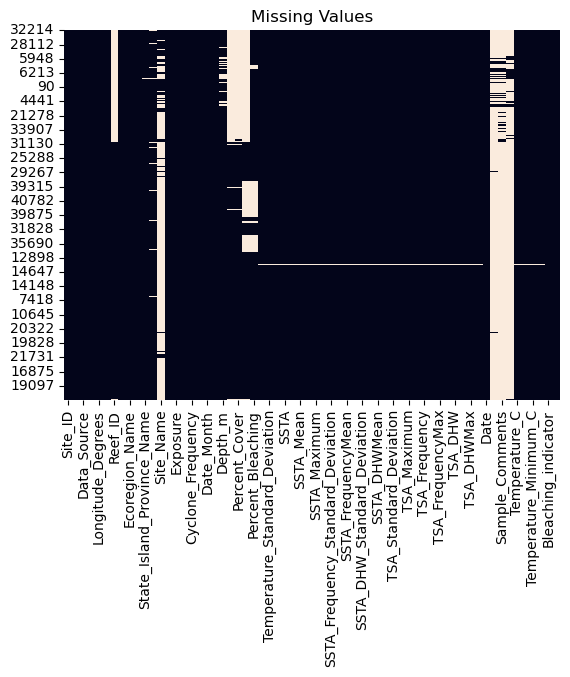

In [13]:
# remove columns without missing data?
sns.heatmap(df_1.sort_values('Data_Source').isnull(), cbar=False)
plt.title('Missing Values')

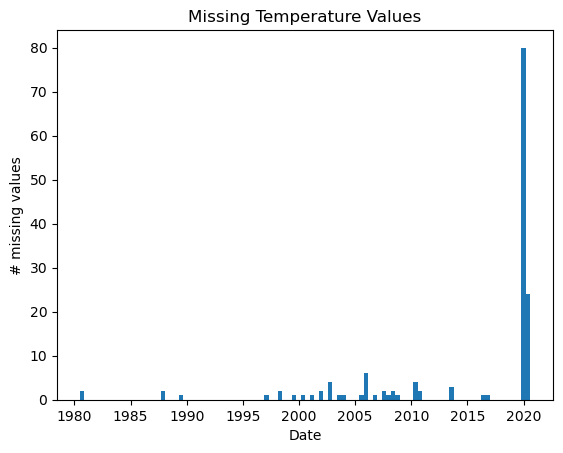

In [14]:
# Where are the missing temperatures?
missing_temp = df_1[df_1['Temperature_C'].isnull()]
_ = plt.hist(missing_temp['Date'], bins=100)
_ = plt.xlabel('Date')
_ = plt.ylabel('# missing values')
_ = plt.title('Missing Temperature Values')

Clearly the majority of missing termperature values are in 2020. I will opt to drop these rows because there are relatively few compared to the overall dataset. 

In [15]:
# where is depth missing location? 
missing_depth = df_1[df_1['Depth_m'].isnull()]

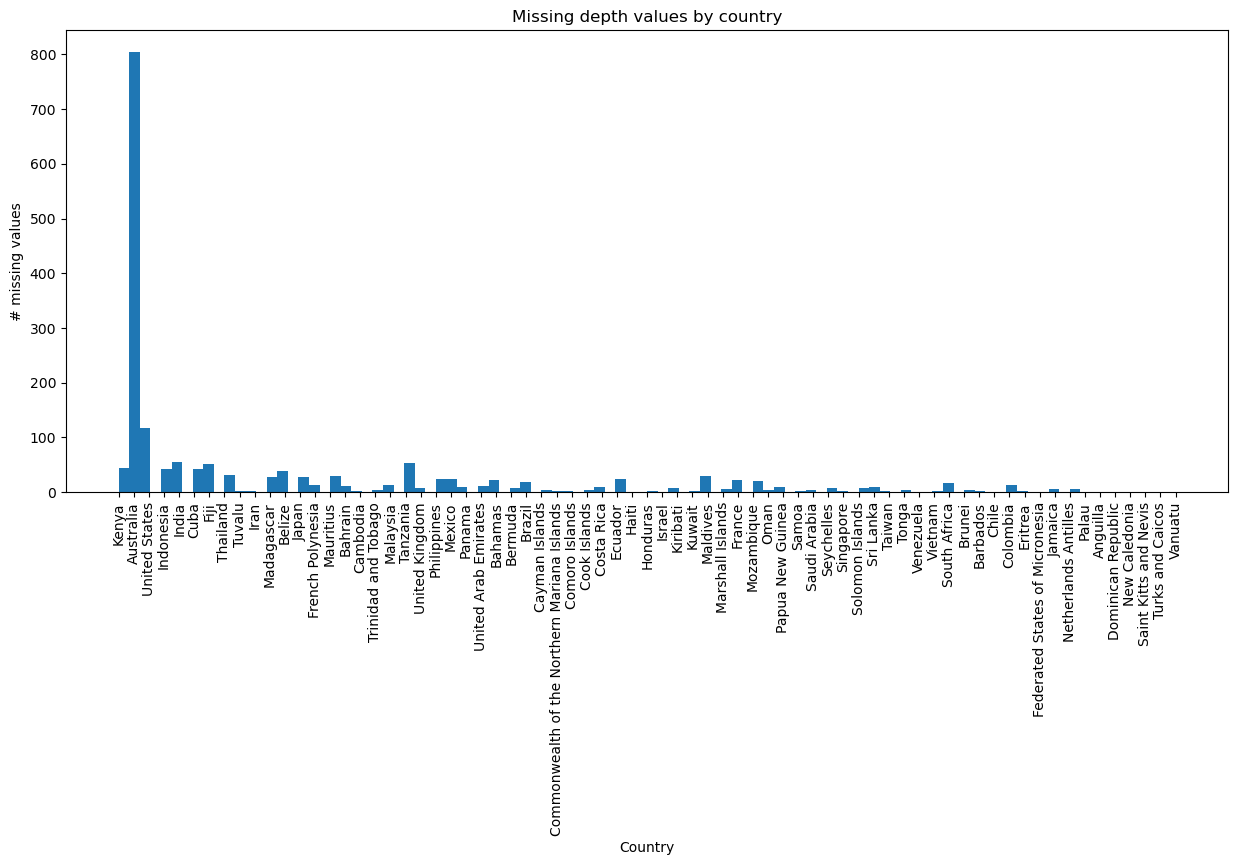

In [16]:
_ = plt.figure(figsize=(15,6))
_ = plt.hist(missing_depth['Country_Name'], bins=100)
_ = plt.xlabel('Country')
_ = plt.ylabel('# missing values')
_ = plt.xticks(rotation=90)
_ = plt.title('Missing depth values by country')

In [17]:
# Australia has the largest number of missing depth values. 
# There seems to be variation in the depth depending on the state/island
australia = df_1[df_1['Country_Name']=='Australia'].groupby('State_Island_Province_Name')
australia['Depth_m'].describe()

,count,mean,std,min,25%,50%,75%,max
State_Island_Province_Name,,,,,,,,
Christmas Island,40.0,6.675000,2.502691,3.50,4.00,6.0,8.5,11.0
Cocos (Keeling) Islands,100.0,8.320000,3.004643,3.00,10.00,10.0,10.0,10.0
New South Wales,1.0,15.000000,NaN,15.00,15.00,15.0,15.0,15.0
Northern Territory,7.0,3.821429,1.754247,1.25,2.75,4.0,5.0,6.0
Queensland,1932.0,5.179658,3.297648,0.10,3.00,5.0,6.0,90.0
Western Australia,72.0,2.569444,1.957840,1.00,1.00,2.0,3.0,11.0


In [18]:
# Impute missing depths with median; use state/province if exists
# otherwise depths will be imputed using median by Country 

df_2 = df_1
countries = df_2.groupby('Country_Name')
countries_state = df_1.groupby(['Country_Name','State_Island_Province_Name'])

for i in range(len(df_2)):
    row = df_2.loc[i]
    country = row['Country_Name']
    state = row['State_Island_Province_Name']
    
    # depth is null and state exists, impute with state median
    if df_2['Depth_m'].isnull()[i] and state is not None:
        try:
            df_2.loc[i, 'Depth_m'] = countries_state['Depth_m'].get_group((country,state)).median()
        except: 
            pass
    
    # depth is null and state does not exist, impute with country median
    if df_2['Depth_m'].isnull()[i]:
        try:
            df_2.loc[i, 'Depth_m'] = countries['Depth_m'].get_group(country).median()
        except: 
            pass
        
    else: 
        pass


df_2[df_2['Depth_m'].isnull()]

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Substrate_Name,Percent_Cover,Bleaching_Level,Percent_Bleaching,ClimSST,Temperature_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments,Temperature_C,Temperature_Mean_C,Temperature_Minimum_C,Temperature_Maximum_C,Bleaching_indicator,Exposure_cat
197,8503,10327676,Donner,-8.5000,179.1800,Pacific,None,Eastern Indo-Pacific,Samoa Tuvalu and Tonga,Tuvalu,Vaiaku,Te Namo Lagoon,None,1561.17,Sheltered,0.0495,44.93,15,5,2002,NaN,None,NaN,None,60.0,302.12,0.82,2.0,0.29,1.0,0.0,-2.94,2.76,4.0,4.06,23.0,3.0,3.30,2.39,21.66,1.30,-0.19,0.82,-3.65,2.19,-0.51,0.0,1.91,8.0,1.0,0.00,1.30,9.92,0.54,2002-05-15,For the two sites we have analyzed so far; we ...,For the two sites we have analyzed so far; we ...,None,29.52,29.19,26.05,31.90,1,0.0
1783,7832,10327382,Donner,1.2361,103.8200,Pacific,None,Central Indo-Pacific,Strait of Malacca,Singapore,Singapore Strait,Sentosa,None,1030.05,Sheltered,0.2257,47.57,15,6,1998,NaN,None,NaN,None,75.0,302.24,1.41,1.0,0.90,1.0,0.0,-4.90,3.88,18.0,7.18,44.0,8.0,7.14,3.75,23.04,2.74,0.71,1.41,-6.11,3.60,-1.30,4.0,1.87,9.0,1.0,6.31,1.36,8.83,0.44,1998-06-15,90% bleaching (GCRMN 2000),90% bleaching (GCRMN 2000),Bleaching percent averaged from code: Severe (...,30.40,28.38,23.57,33.30,1,0.0
1784,7833,10327383,Donner,1.2833,103.8667,Pacific,None,Central Indo-Pacific,Strait of Malacca,Singapore,Singapore Strait,None,None,383.01,Sheltered,0.2531,47.00,15,6,1998,NaN,None,NaN,None,75.0,302.14,1.43,1.0,0.75,1.0,0.0,-4.90,3.01,18.0,7.43,35.0,8.0,6.41,3.67,20.59,2.72,0.56,1.43,-5.92,2.19,-1.31,5.0,2.57,15.0,1.0,5.16,1.65,15.24,0.50,1998-06-15,Seawater temperatures was 33C. Normally; water...,Seawater temperatures was 33C. Normally; water...,Bleaching percent averaged from code: Severe (...,30.16,28.28,23.67,31.79,1,0.0
1819,8504,10327677,Donner,-8.0000,178.3667,Pacific,None,Eastern Indo-Pacific,Samoa Tuvalu and Tonga,Tuvalu,Nukufetau,Motulalo,None,2199.23,Sheltered,0.0562,44.01,15,10,2004,NaN,None,NaN,None,75.0,302.94,0.81,4.0,-0.16,1.0,0.0,-2.86,3.55,5.0,4.41,22.0,4.0,1.05,2.15,16.25,1.38,-0.40,0.81,-3.21,3.10,-0.53,3.0,1.46,7.0,1.0,0.00,0.97,6.79,0.45,2004-10-15,reported by Kim Friedman on SPC survey,reported by Kim Friedman on SPC survey,Bleaching percent averaged from code: Severe (...,29.39,29.25,26.58,32.90,1,0.0


In [19]:
# Singapore and Tuvalu do not have any depth measures, so will impute with overall median

df_2['Depth_m'] = df_2['Depth_m'].fillna(df_1['Depth_m'].median())

In [20]:
# Drop rows with missing values for Percent_Bleaching and Temperature_C
df_clean = df_2.dropna(subset=['Percent_Bleaching', 'Temperature_C'])

# Drop unnecessary columns with many missing values
drop_columns = ['Bleaching_Level', 'Percent_Cover', 'Site_Name', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments']
df_clean = df_clean.drop(columns=drop_columns)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34393 entries, 0 to 35044
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Site_ID                            34393 non-null  int64         
 1   Sample_ID                          34393 non-null  int64         
 2   Data_Source                        34393 non-null  object        
 3   Latitude_Degrees                   34393 non-null  float64       
 4   Longitude_Degrees                  34393 non-null  float64       
 5   Ocean_Name                         34393 non-null  object        
 6   Reef_ID                            22421 non-null  object        
 7   Realm_Name                         34393 non-null  object        
 8   Ecoregion_Name                     34390 non-null  object        
 9   Country_Name                       34393 non-null  object        
 10  State_Island_Province_Name        

### 4. Save the cleaned data

In [21]:
datapath = '../data/interim/coral_bleaching_cleaned_v1.csv'
df_clean.to_csv(datapath)


### Upcoming EDA

- bleaching and temperature trends by region and time
- look into the different temperature measures and determine which one's are most important and/or which can be dropped


Variables of interest:
- Distance_to_Shore
- Turbidity
- Cyclone_Frequency
- Depth_m
- Temperature
- Windspeed
- SSTA
- TSA
- Exposure
- Realm_Name (region)
